In [1]:
import cv2
import os
import json
import matplotlib.pyplot as plt
import numpy as np

In [16]:
left_hand = [112:133]
right_hand = [91:112]
shoulder_arm = [5:11]
face = [23:91]

SyntaxError: invalid syntax (3075601627.py, line 1)

In [2]:
#Corredsponding result.left_hand_landmarks.landmark
def exact_keypoints(x_coord, y_coord):
    left_hand = np.array([[x_coord[i], y_coord[i]] for i in range(112,133)]).flatten()

    #Corredsponding result.right_hand_landmarks.landmark
    right_hand = np.array([[x_coord[i], y_coord[i]] for i in range(91,112)]).flatten()

    shoulder_arm = np.array([[x_coord[i], y_coord[i]] for i in range(5,11)]).flatten()

    #Face
    face = np.array([[x_coord[i], y_coord[i]] for i in range(23,91)]).flatten()
    
    return np.concatenate([face, shoulder_arm, right_hand, left_hand])

In [27]:
lh

array([ 0.21481481,  0.45833333,  0.23703704,  0.43055556,  0.26481481,
        0.40277778,  0.28333333,  0.36944444,  0.31296296,  0.34166667,
        0.25185185,  0.32222222,  0.25555556,  0.28333333,  0.26111111,
        0.25555556,  0.26666667,  0.21944444,  0.22222222,  0.31388889,
        0.22592593,  0.26944444,  0.23148148,  0.23333333,  0.23518519,
        0.19166667,  0.20185185,  0.31944444,  0.19814815,  0.27777778,
       -0.0037037 , -0.01111111, -0.0037037 , -0.01111111,  0.17592593,
        0.33055556,  0.17222222,  0.30277778,  0.16666667,  0.275     ,
        0.15740741,  0.24444444])

In [42]:
exact_keypoints(x_coord, y_coord).shape

(232,)

# SETUP FOLDER FOR COLLECTION

In [3]:
import numpy as np
DATA_PATH = os.path.join("data3")

actions = np.array(["Like", "Hello"])

no_sequences = 30

sequence_length = 30


In [4]:
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

In [5]:
#Create data image

cap = cv2.VideoCapture(0)

for action in actions:

    for sequence in range(no_sequences):   #Số chuỗi frame 

        for frame_num in range(sequence_length):  #Số frame liên tiếp của 1 action

            _, image = cap.read()

            height, width, _ = image.shape
            if frame_num == 0:

                cv2.putText(image, "START COLLECTING", (120, 200),
                           cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 4, cv2.LINE_AA)

                cv2.putText(image, "Frame for {} Video Number {}".format(action, sequence),
                           (15, 12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 4, cv2.LINE_AA)
                cv2.imshow("Video", image)
                cv2.waitKey(2000)
            else:
                cv2.putText(image, "Frame for {} Video Number {}".format(action, sequence),
                           (15, 12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 4, cv2.LINE_AA)
                cv2.imshow("Video", image)

            cv2.imwrite(DATA_PATH +"/"+ action +"/"+ str(sequence)+"/"+ str(frame_num)+".jpg", image)


            if cv2.waitKey(10) & 0xFF == ord("q"):
                break
cap.release()
cv2.destroyAllWindows()

In [7]:
#Create data numpy array from image

PATH_CHECKPOINT = "shufflenetv2k16-wholebody"
for action in actions:

    for sequence in range(no_sequences):   #Số chuỗi frame 

        for frame_num in range(sequence_length):  #Số frame liên tiếp của 1 action

            PATH_IMAGE_OUTPUT = DATA_PATH +"/"+ action +"/"+ str(sequence)+"/"+ str(frame_num)+".jpg"
            PATH_IMAGE_KEYPOINT = DATA_PATH +"/"+ action +"/"+ str(sequence)+"/"+ str(frame_num)+"_keypoint.jpg"
            PATH_JSON_OUTPUT = DATA_PATH +"/"+ action +"/"+ str(sequence)+"/"+ str(frame_num)+".json"
            height, width, _ = image.shape


            os.system("python -m openpifpaf.predict " + PATH_IMAGE_OUTPUT +
                  " --checkpoint="+PATH_CHECKPOINT+
                  " --line-width=1 --json-output "+PATH_JSON_OUTPUT+
                     " --image-output "+PATH_IMAGE_KEYPOINT)

            json_output = json.load(open(PATH_JSON_OUTPUT))
            person = json_output[0]
            list_keypoint = person["keypoints"]
            x_coord = [int(list_keypoint[i])/width for i in range(0, len(list_keypoint), 3)]
            y_coord = [int(list_keypoint[i])/height for i in range(1, len(list_keypoint), 3)]

            keypoints = exact_keypoints(x_coord, y_coord)
            npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))

            np.save(npy_path, keypoints)



INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.cifcaf:annotations 1: [104]
INFO:openpifpaf.predictor:batch 0: data3/Like/0/0.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders a

/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.cifcaf:annotations 1: [102]
INFO:openpifpaf.predictor:batch 0: data3/Like/0/12.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --d

/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
INFO:openpifpaf.decoder.cifcaf:annotations 1: [102]
INFO:openpifpaf.predictor:batch 0: data3/Like/0/23.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.cifcaf:annotations 1: [102]
INFO:openpifpaf.predictor:batch 0: data3/Like/0/24.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.c

INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:openpifpaf.decoder.cifcaf:annotations 1: [102]
INFO:openpifpaf.predictor:batch 0: data3/Like/1/5.jpg
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders a

/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.cifcaf:annotations 1: [104]
INFO:openpifpaf.predictor:batch 0: data3/Like/1/17.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --d

/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
INFO:openpifpaf.decoder.cifcaf:annotations 1: [102]
INFO:openpifpaf.predictor:batch 0: data3/Like/1/28.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
INFO:openpifpaf.decoder.cifcaf:annotations 1: [100]
INFO:openpifpaf.predictor:batch 0: data3/Like/1/29.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.c

INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.cifcaf:annotations 1: [102]
INFO:openpifpaf.predictor:batch 0: data3/Like/2/10.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders 

INFO:openpifpaf.decoder.cifcaf:annotations 1: [102]
INFO:openpifpaf.predictor:batch 0: data3/Like/2/21.jpg
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.cifcaf:annotations 1: [102]
INFO:openpifpaf.predictor:batch 0: data3/Like/2/22.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decod

/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
INFO:openpifpaf.decoder.cifcaf:annotations 1: [102]
INFO:openpifpaf.predictor:batch 0: data3/Like/3/3.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.cifcaf:annotations 1: [100]
INFO:openpifpaf.predictor:batch 0: data3/Like/3/4.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp

INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.cifcaf:annotations 1: [83]
INFO:openpifpaf.predictor:batch 0: data3/Like/3/15.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders a

/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:openpifpaf.decoder.cifcaf:annotations 1: [102]
INFO:openpifpaf.predictor:batch 0: data3/Like/3/26.jpg
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.cifcaf:annotations 1: [101]
INFO:openpifpaf.predictor:batch 0: data3/Like/3/27.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.c

INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.cifcaf:annotations 1: [104]
INFO:openpifpaf.predictor:batch 0: data3/Like/4/8.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders a

INFO:openpifpaf.predictor:batch 0: data3/Like/4/19.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.cifcaf:annotations 1: [102]
INFO:openpifpaf.predictor:batch 0: data3/Like/4/20.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__ma

INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
INFO:openpifpaf.decoder.cifcaf:annotations 1: [104]
INFO:openpifpaf.predictor:batch 0: data3/Like/5/1.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network devic

/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.cifcaf:annotations 1: [103]
INFO:openpifpaf.predictor:batch 0: data3/Like/5/13.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True,

INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.cifcaf:annotations 1: [101]
INFO:openpifpaf.predictor:batch 0: data3/Like/5/24.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network devi

/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:openpifpaf.decoder.cifcaf:annotations 1: [103]
INFO:openpifpaf.predictor:batch 0: data3/Like/6/6.jpg
INFO:__main__:neural network device: cuda (CUDA available: True, 

INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.cifcaf:annotations 1: [91]
INFO:openpifpaf.predictor:batch 0: data3/Like/6/17.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network devic

INFO:openpifpaf.decoder.cifcaf:annotations 1: [102]
INFO:openpifpaf.predictor:batch 0: data3/Like/6/28.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
INFO:openpifpaf.decoder.cifcaf:annotations 1: [103]
INFO:openpifpaf.predictor:batch 0: data3/Like/6/29.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.c

INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.cifcaf:annotations 1: [102]
INFO:openpifpaf.predictor:batch 0: data3/Like/7/10.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders 

/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.cifcaf:annotations 1: [101]
INFO:openpifpaf.predictor:batch 0: data3/Like/7/22.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --d

INFO:openpifpaf.decoder.cifcaf:annotations 1: [97]
INFO:openpifpaf.predictor:batch 0: data3/Like/8/3.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
INFO:openpifpaf.decoder.cifcaf:annotations 1: [101]
INFO:openpifpaf.predictor:batch 0: data3/Like/8/4.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, 

INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.cifcaf:annotations 1: [101]
INFO:openpifpaf.predictor:batch 0: data3/Like/8/15.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network devi

/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.cifcaf:annotations 1: [103]
INFO:openpifpaf.predictor:batch 0: data3/Like/8/27.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True,

INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.cifcaf:annotations 1: [102]
INFO:openpifpaf.predictor:batch 0: data3/Like/9/8.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network devic

/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.cifcaf:annotations 1: [102]
INFO:openpifpaf.predictor:batch 0: data3/Like/9/20.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True,

INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.cifcaf:annotations 1: [102]
INFO:openpifpaf.predictor:batch 0: data3/Like/10/1.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network devi

/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.cifcaf:annotations 1: [101]
INFO:openpifpaf.predictor:batch 0: data3/Like/10/13.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --

/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.cifcaf:annotations 1: [104]
INFO:openpifpaf.predictor:batch 0: data3/Like/10/25.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True

INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.cifcaf:annotations 1: [102]
INFO:openpifpaf.predictor:batch 0: data3/Like/11/6.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network devi

/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.cifcaf:annotations 1: [103]
INFO:openpifpaf.predictor:batch 0: data3/Like/11/18.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True

INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.cifcaf:annotations 1: [95]
INFO:openpifpaf.predictor:batch 0: data3/Like/11/29.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network devi

/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.cifcaf:annotations 1: [104]
INFO:openpifpaf.predictor:batch 0: data3/Like/12/11.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True

INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.cifcaf:annotations 1: [89]
INFO:openpifpaf.predictor:batch 0: data3/Like/12/22.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network devi

/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.cifcaf:annotations 1: [104]
INFO:openpifpaf.predictor:batch 0: data3/Like/13/4.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True,

INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.cifcaf:annotations 1: [103]
INFO:openpifpaf.predictor:batch 0: data3/Like/13/15.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network dev

/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.cifcaf:annotations 1: [100]
INFO:openpifpaf.predictor:batch 0: data3/Like/13/27.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True

INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.cifcaf:annotations 1: [104]
INFO:openpifpaf.predictor:batch 0: data3/Like/14/8.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network devi

/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.cifcaf:annotations 1: [102]
INFO:openpifpaf.predictor:batch 0: data3/Like/14/20.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --

INFO:openpifpaf.decoder.cifcaf:annotations 1: [103]
INFO:openpifpaf.predictor:batch 0: data3/Like/15/1.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.cifcaf:annotations 1: [103]
INFO:openpifpaf.predictor:batch 0: data3/Like/15/2.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: Tru

INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.cifcaf:annotations 1: [101]
INFO:openpifpaf.predictor:batch 0: data3/Like/15/13.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network dev

/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.cifcaf:annotations 1: [101]
INFO:openpifpaf.predictor:batch 0: data3/Like/15/25.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --

/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
INFO:openpifpaf.decoder.cifcaf:annotations 1: [110]
INFO:openpifpaf.predictor:batch 0: data3/Like/16/7.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True,

INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.cifcaf:annotations 1: [107]
INFO:openpifpaf.predictor:batch 0: data3/Like/16/18.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network dev

/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.cifcaf:annotations 1: [109]
INFO:openpifpaf.predictor:batch 0: data3/Like/17/0.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True,

INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
INFO:openpifpaf.decoder.cifcaf:annotations 1: [106]
INFO:openpifpaf.predictor:batch 0: data3/Like/17/11.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network dev

/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.cifcaf:annotations 1: [106]
INFO:openpifpaf.predictor:batch 0: data3/Like/17/23.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True

INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.cifcaf:annotations 1: [108]
INFO:openpifpaf.predictor:batch 0: data3/Like/18/4.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network devi

/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.cifcaf:annotations 1: [106]
INFO:openpifpaf.predictor:batch 0: data3/Like/18/16.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True

INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.cifcaf:annotations 1: [107]
INFO:openpifpaf.predictor:batch 0: data3/Like/18/27.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network dev

/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.cifcaf:annotations 1: [107]
INFO:openpifpaf.predictor:batch 0: data3/Like/19/9.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True,

INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.cifcaf:annotations 1: [105]
INFO:openpifpaf.predictor:batch 0: data3/Like/19/20.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network dev

/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
INFO:openpifpaf.decoder.cifcaf:annotations 1: [106]
INFO:openpifpaf.predictor:batch 0: data3/Like/20/2.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True,

INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
INFO:openpifpaf.decoder.cifcaf:annotations 1: [106]
INFO:openpifpaf.predictor:batch 0: data3/Like/20/13.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network dev

INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.cifcaf:annotations 1: [106]
INFO:openpifpaf.predictor:batch 0: data3/Like/20/25.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders

/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
INFO:openpifpaf.decoder.cifcaf:annotations 1: [105]
INFO:openpifpaf.predictor:batch 0: data3/Like/21/6.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.cifcaf:annotations 1: [104]
INFO:openpifpaf.predictor:batch 0: data3/Like/21/7.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.c

INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.cifcaf:annotations 1: [105]
INFO:openpifpaf.predictor:batch 0: data3/Like/21/18.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders

/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.cifcaf:annotations 1: [107]
INFO:openpifpaf.predictor:batch 0: data3/Like/22/0.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True,

INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.cifcaf:annotations 1: [105]
INFO:openpifpaf.predictor:batch 0: data3/Like/22/11.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network dev

INFO:openpifpaf.decoder.cifcaf:annotations 1: [107]
INFO:openpifpaf.predictor:batch 0: data3/Like/22/22.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.cifcaf:annotations 1: [105]
INFO:openpifpaf.predictor:batch 0: data3/Like/22/23.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy

INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.cifcaf:annotations 1: [106]
INFO:openpifpaf.predictor:batch 0: data3/Like/23/4.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders 

/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.cifcaf:annotations 1: [106]
INFO:openpifpaf.predictor:batch 0: data3/Like/23/16.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True

INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.cifcaf:annotations 1: [107]
INFO:openpifpaf.predictor:batch 0: data3/Like/23/27.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network dev

/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.cifcaf:annotations 1: [107]
INFO:openpifpaf.predictor:batch 0: data3/Like/24/9.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True,

INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.cifcaf:annotations 1: [108]
INFO:openpifpaf.predictor:batch 0: data3/Like/24/20.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network dev

/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.cifcaf:annotations 1: [107]
INFO:openpifpaf.predictor:batch 0: data3/Like/25/2.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True,

INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
INFO:openpifpaf.decoder.cifcaf:annotations 1: [105]
INFO:openpifpaf.predictor:batch 0: data3/Like/25/13.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network dev

INFO:openpifpaf.decoder.cifcaf:annotations 1: [107]
INFO:openpifpaf.predictor:batch 0: data3/Like/25/24.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.cifcaf:annotations 1: [106]
INFO:openpifpaf.predictor:batch 0: data3/Like/25/25.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy

INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.cifcaf:annotations 1: [106]
INFO:openpifpaf.predictor:batch 0: data3/Like/26/6.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders 

/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
INFO:openpifpaf.decoder.cifcaf:annotations 1: [108]
INFO:openpifpaf.predictor:batch 0: data3/Like/26/18.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True

INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
INFO:openpifpaf.decoder.cifcaf:annotations 1: [107]
INFO:openpifpaf.predictor:batch 0: data3/Like/26/29.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network dev

/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.cifcaf:annotations 1: [106]
INFO:openpifpaf.predictor:batch 0: data3/Like/27/11.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True

INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.cifcaf:annotations 1: [107]
INFO:openpifpaf.predictor:batch 0: data3/Like/27/22.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network dev

/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.cifcaf:annotations 1: [107]
INFO:openpifpaf.predictor:batch 0: data3/Like/28/4.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True,

INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.cifcaf:annotations 1: [109]
INFO:openpifpaf.predictor:batch 0: data3/Like/28/15.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network dev

INFO:openpifpaf.decoder.cifcaf:annotations 1: [107]
INFO:openpifpaf.predictor:batch 0: data3/Like/28/26.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
INFO:openpifpaf.decoder.cifcaf:annotations 1: [107]
INFO:openpifpaf.predictor:batch 0: data3/Like/28/27.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy

INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.cifcaf:annotations 1: [108]
INFO:openpifpaf.predictor:batch 0: data3/Like/29/8.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders 

/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.cifcaf:annotations 1: [107]
INFO:openpifpaf.predictor:batch 0: data3/Like/29/20.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --

/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.cifcaf:annotations 1: [107]
INFO:openpifpaf.predictor:batch 0: data3/Hello/0/2.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --d

/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.cifcaf:annotations 1: [101]
INFO:openpifpaf.predictor:batch 0: data3/Hello/0/14.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True

INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.cifcaf:annotations 1: [87]
INFO:openpifpaf.predictor:batch 0: data3/Hello/0/25.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network devi

INFO:openpifpaf.decoder.cifcaf:annotations 1: [99]
INFO:openpifpaf.predictor:batch 0: data3/Hello/1/6.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.cifcaf:annotations 1: [97]
INFO:openpifpaf.predictor:batch 0: data3/Hello/1/7.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp

INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.cifcaf:annotations 1: [103]
INFO:openpifpaf.predictor:batch 0: data3/Hello/1/18.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders

/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.cifcaf:annotations 1: [90]
INFO:openpifpaf.predictor:batch 0: data3/Hello/2/0.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, 

INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
INFO:openpifpaf.decoder.cifcaf:annotations 1: [95]
INFO:openpifpaf.predictor:batch 0: data3/Hello/2/11.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network devi

INFO:openpifpaf.decoder.cifcaf:annotations 1: [103]
INFO:openpifpaf.predictor:batch 0: data3/Hello/2/22.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.cifcaf:annotations 1: [103]
INFO:openpifpaf.predictor:batch 0: data3/Hello/2/23.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy

INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.cifcaf:annotations 1: [99]
INFO:openpifpaf.predictor:batch 0: data3/Hello/3/4.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders a

INFO:openpifpaf.decoder.cifcaf:annotations 1: [104]
INFO:openpifpaf.predictor:batch 0: data3/Hello/3/15.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
INFO:openpifpaf.decoder.cifcaf:annotations 1: [101]
INFO:openpifpaf.predictor:batch 0: data3/Hello/3/16.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy

INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.cifcaf:annotations 1: [96]
INFO:openpifpaf.predictor:batch 0: data3/Hello/3/27.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders 

/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.cifcaf:annotations 1: [95]
INFO:openpifpaf.predictor:batch 0: data3/Hello/4/9.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, 

INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.cifcaf:annotations 1: [101]
INFO:openpifpaf.predictor:batch 0: data3/Hello/4/20.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network dev

INFO:openpifpaf.decoder.cifcaf:annotations 1: [94]
INFO:openpifpaf.predictor:batch 0: data3/Hello/5/1.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.cifcaf:annotations 1: [102]
INFO:openpifpaf.predictor:batch 0: data3/Hello/5/2.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cp

INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.cifcaf:annotations 1: [98]
INFO:openpifpaf.predictor:batch 0: data3/Hello/5/13.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders 

INFO:openpifpaf.decoder.cifcaf:annotations 1: [90]
INFO:openpifpaf.predictor:batch 0: data3/Hello/5/24.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.cifcaf:annotations 1: [91]
INFO:openpifpaf.predictor:batch 0: data3/Hello/5/25.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.c

INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:openpifpaf.decoder.cifcaf:annotations 1: [96]
INFO:openpifpaf.predictor:batch 0: data3/Hello/6/6.jpg
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders a

INFO:openpifpaf.decoder.cifcaf:annotations 1: [91]
INFO:openpifpaf.predictor:batch 0: data3/Hello/6/17.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
INFO:openpifpaf.decoder.cifcaf:annotations 1: [94]
INFO:openpifpaf.predictor:batch 0: data3/Hello/6/18.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.c

INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.cifcaf:annotations 1: [99]
INFO:openpifpaf.predictor:batch 0: data3/Hello/6/29.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders 

/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.cifcaf:annotations 1: [102]
INFO:openpifpaf.predictor:batch 0: data3/Hello/7/11.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True

INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.cifcaf:annotations 1: [93]
INFO:openpifpaf.predictor:batch 0: data3/Hello/7/22.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network devi

INFO:openpifpaf.decoder.cifcaf:annotations 1: [94]
INFO:openpifpaf.predictor:batch 0: data3/Hello/8/3.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.cifcaf:annotations 1: [94]
INFO:openpifpaf.predictor:batch 0: data3/Hello/8/4.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp

INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.cifcaf:annotations 1: [97]
INFO:openpifpaf.predictor:batch 0: data3/Hello/8/15.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders 

INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.cifcaf:annotations 1: [101]
INFO:openpifpaf.predictor:batch 0: data3/Hello/8/27.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders

INFO:openpifpaf.decoder.cifcaf:annotations 1: [103]
INFO:openpifpaf.predictor:batch 0: data3/Hello/9/8.jpg
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
INFO:openpifpaf.decoder.cifcaf:annotations 1: [99]
INFO:openpifpaf.predictor:batch 0: data3/Hello/9/9.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decode

/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.cifcaf:annotations 1: [100]
INFO:openpifpaf.predictor:batch 0: data3/Hello/9/21.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True

INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.cifcaf:annotations 1: [100]
INFO:openpifpaf.predictor:batch 0: data3/Hello/10/2.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network dev

/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.cifcaf:annotations 1: [89]
INFO:openpifpaf.predictor:batch 0: data3/Hello/10/14.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True

INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.cifcaf:annotations 1: [87]
INFO:openpifpaf.predictor:batch 0: data3/Hello/10/25.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network dev

INFO:openpifpaf.decoder.cifcaf:annotations 1: [88]
INFO:openpifpaf.predictor:batch 0: data3/Hello/11/6.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
INFO:openpifpaf.decoder.cifcaf:annotations 1: [89]
INFO:openpifpaf.predictor:batch 0: data3/Hello/11/7.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.c

INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
INFO:openpifpaf.decoder.cifcaf:annotations 1: [87]
INFO:openpifpaf.predictor:batch 0: data3/Hello/11/18.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders

INFO:openpifpaf.decoder.cifcaf:annotations 1: [101]
INFO:openpifpaf.predictor:batch 0: data3/Hello/11/29.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.cifcaf:annotations 1: [87]
INFO:openpifpaf.predictor:batch 0: data3/Hello/12/0.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: T

INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
INFO:openpifpaf.decoder.cifcaf:annotations 1: [102]
INFO:openpifpaf.predictor:batch 0: data3/Hello/12/11.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network de

INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.cifcaf:annotations 1: [100]
INFO:openpifpaf.predictor:batch 0: data3/Hello/12/23.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoder

INFO:openpifpaf.decoder.cifcaf:annotations 1: [95]
INFO:openpifpaf.predictor:batch 0: data3/Hello/13/4.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:openpifpaf.decoder.cifcaf:annotations 1: [98]
INFO:openpifp

INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.cifcaf:annotations 1: [97]
INFO:openpifpaf.predictor:batch 0: data3/Hello/13/16.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders

INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:openpifpaf.decoder.cifcaf:annotations 1: [103]
INFO:openpifpaf.predictor:batch 0: data3/Hello/13/28.jpg
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoder

INFO:openpifpaf.decoder.cifcaf:annotations 1: [96]
INFO:openpifpaf.predictor:batch 0: data3/Hello/14/9.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.cifcaf:annotations 1: [101]
INFO:openpifpaf.predictor:batch 0: data3/Hello/14/10.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy

INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.cifcaf:annotations 1: [93]
INFO:openpifpaf.predictor:batch 0: data3/Hello/14/21.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders

/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.cifcaf:annotations 1: [103]
INFO:openpifpaf.predictor:batch 0: data3/Hello/15/3.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True

INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.cifcaf:annotations 1: [103]
INFO:openpifpaf.predictor:batch 0: data3/Hello/15/14.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network de

INFO:openpifpaf.decoder.cifcaf:annotations 1: [101]
INFO:openpifpaf.predictor:batch 0: data3/Hello/15/25.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.cifcaf:annotations 1: [101]
INFO:openpifpaf.predictor:batch 0: data3/Hello/15/26.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupan

INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:openpifpaf.decoder.cifcaf:annotations 1: [101]
INFO:openpifpaf.predictor:batch 0: data3/Hello/16/7.jpg
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders

INFO:openpifpaf.decoder.cifcaf:annotations 1: [101]
INFO:openpifpaf.predictor:batch 0: data3/Hello/16/18.jpg
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.cifcaf:annotations 1: [104]
INFO:openpifpaf.predictor:batch 0: data3/Hello/16/19.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --d

/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.cifcaf:annotations 1: [103]
INFO:openpifpaf.predictor:batch 0: data3/Hello/17/1.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True

INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
INFO:openpifpaf.decoder.cifcaf:annotations 1: [103]
INFO:openpifpaf.predictor:batch 0: data3/Hello/17/12.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network de

INFO:openpifpaf.decoder.cifcaf:annotations 1: [105]
INFO:openpifpaf.predictor:batch 0: data3/Hello/17/23.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.cifcaf:annotations 1: [103]
INFO:openpifpaf.predictor:batch 0: data3/Hello/17/24.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupan

INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.cifcaf:annotations 1: [99]
INFO:openpifpaf.predictor:batch 0: data3/Hello/18/5.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders 

/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.cifcaf:annotations 1: [105]
INFO:openpifpaf.predictor:batch 0: data3/Hello/18/17.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: Tru

INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.cifcaf:annotations 1: [101]
INFO:openpifpaf.predictor:batch 0: data3/Hello/18/28.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network de

INFO:openpifpaf.decoder.cifcaf:annotations 1: [99]
INFO:openpifpaf.predictor:batch 0: data3/Hello/19/9.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.cifcaf:annotations 1: [97]
INFO:openpifpaf.predictor:batch 0: data3/Hello/19/10.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.

INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
INFO:openpifpaf.decoder.cifcaf:annotations 1: [103]
INFO:openpifpaf.predictor:batch 0: data3/Hello/19/21.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoder

INFO:openpifpaf.decoder.cifcaf:annotations 1: [103]
INFO:openpifpaf.predictor:batch 0: data3/Hello/20/2.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.cifcaf:annotations 1: [103]
INFO:openpifpaf.predictor:batch 0: data3/Hello/20/3.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy

INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.cifcaf:annotations 1: [94]
INFO:openpifpaf.predictor:batch 0: data3/Hello/20/14.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders

/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
INFO:openpifpaf.decoder.cifcaf:annotations 1: [97]
INFO:openpifpaf.predictor:batch 0: data3/Hello/20/26.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True

INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.cifcaf:annotations 1: [104]
INFO:openpifpaf.predictor:batch 0: data3/Hello/21/7.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network dev

/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.cifcaf:annotations 1: [103]
INFO:openpifpaf.predictor:batch 0: data3/Hello/21/19.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: Tru

INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.cifcaf:annotations 1: [104]
INFO:openpifpaf.predictor:batch 0: data3/Hello/22/0.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network dev

/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.cifcaf:annotations 1: [103]
INFO:openpifpaf.predictor:batch 0: data3/Hello/22/12.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: Tru

INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
INFO:openpifpaf.decoder.cifcaf:annotations 1: [102]
INFO:openpifpaf.predictor:batch 0: data3/Hello/22/23.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network de

INFO:openpifpaf.decoder.cifcaf:annotations 1: [104]
INFO:openpifpaf.predictor:batch 0: data3/Hello/23/4.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.cifcaf:annotations 1: [105]
INFO:openpifpaf.predictor:batch 0: data3/Hello/23/5.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy

INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.cifcaf:annotations 1: [104]
INFO:openpifpaf.predictor:batch 0: data3/Hello/23/16.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoder

INFO:openpifpaf.decoder.cifcaf:annotations 1: [103]
INFO:openpifpaf.predictor:batch 0: data3/Hello/23/27.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.cifcaf:annotations 1: [103]
INFO:openpifpaf.predictor:batch 0: data3/Hello/23/28.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupan

INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.cifcaf:annotations 1: [104]
INFO:openpifpaf.predictor:batch 0: data3/Hello/24/9.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders

/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.cifcaf:annotations 1: [105]
INFO:openpifpaf.predictor:batch 0: data3/Hello/24/21.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: Tru

INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.cifcaf:annotations 1: [103]
INFO:openpifpaf.predictor:batch 0: data3/Hello/25/2.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network dev

/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.cifcaf:annotations 1: [104]
INFO:openpifpaf.predictor:batch 0: data3/Hello/25/14.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: Tru

INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.cifcaf:annotations 1: [104]
INFO:openpifpaf.predictor:batch 0: data3/Hello/25/25.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network de

/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:openpifpaf.decoder.cifcaf:annotations 1: [104]
INFO:openpifpaf.predictor:batch 0: data3/Hello/26/6.jpg
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.cifcaf:annotations 1: [103]
INFO:openpifpaf.predictor:batch 0: data3/Hello/26/7.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy

INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.cifcaf:annotations 1: [101]
INFO:openpifpaf.predictor:batch 0: data3/Hello/26/18.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoder

INFO:openpifpaf.decoder.cifcaf:annotations 1: [105]
INFO:openpifpaf.predictor:batch 0: data3/Hello/26/29.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.cifcaf:annotations 1: [104]
INFO:openpifpaf.predictor:batch 0: data3/Hello/27/0.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupanc

INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.cifcaf:annotations 1: [105]
INFO:openpifpaf.predictor:batch 0: data3/Hello/27/11.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoder

/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.cifcaf:annotations 1: [104]
INFO:openpifpaf.predictor:batch 0: data3/Hello/27/23.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: Tru

INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.cifcaf:annotations 1: [105]
INFO:openpifpaf.predictor:batch 0: data3/Hello/28/4.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network dev

INFO:openpifpaf.predictor:batch 0: data3/Hello/28/15.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.cifcaf:annotations 1: [104]
INFO:openpifpaf.predictor:batch 0: data3/Hello/28/16.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:

INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.cifcaf:annotations 1: [104]
INFO:openpifpaf.predictor:batch 0: data3/Hello/28/27.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoder

INFO:openpifpaf.decoder.cifcaf:annotations 1: [105]
INFO:openpifpaf.predictor:batch 0: data3/Hello/29/8.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
INFO:openpifpaf.decoder.cifcaf:annotations 1: [105]
INFO:openpifpaf.predictor:batch 0: data3/Hello/29/9.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy

INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cuda (CUDA available: True, count: 1)
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
INFO:openpifpaf.decoder.cifcaf:annotations 1: [103]
INFO:openpifpaf.predictor:batch 0: data3/Hello/29/20.jpg
/tmp/pip-install-xmunp9c2/openpifpaf/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
INFO:__main__:neural network device: cuda (CUDA available: True, count: 1)
INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoder

# Preprocess Data and Create Labels and Features

In [8]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [9]:
actions

array(['Like', 'Hello'], dtype='<U5')

In [10]:
label_map = {label:num for num, label in enumerate(actions)}
label_map

{'Like': 0, 'Hello': 1}

In [11]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [12]:
X = np.array(sequences)          #X.shape = (90, 30, 1662)
y = to_categorical(labels).astype(int)    #y.shape = (90, 3)

In [13]:
X.shape

(60, 30, 232)

In [14]:
y.shape

(60, 2)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

In [17]:
checkpoint = ModelCheckpoint(filepath='action3.h5',
                           monitor='loss',
                           verbose = 1,
                           save_best_only=True,
                           save_weights_only=False,
                           mode='auto',
                           save_freq='epoch')
learning_rate_reduction = ReduceLROnPlateau(monitor='loss', #Thông số quan sát
                                            patience=20,             #số epoch mà thông số k có sự cải thiện thì giảm lr
                                            verbose=1, 
                                            factor=0.5,               #new_lr = lr * factor
                                            min_lr=0.00001)

In [18]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation="relu", input_shape=(30,232)))
model.add(LSTM(128, return_sequences=True, activation="relu"))
model.add(LSTM(64, return_sequences=False, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(actions.shape[0], activation="softmax"))



2021-12-06 22:57:13.230197: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-06 22:57:13.317888: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-06 22:57:13.318883: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-06 22:57:13.320387: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [19]:
model.compile(optimizer="Adam", loss="categorical_crossentropy", metrics=["categorical_accuracy"])

In [20]:
history = model.fit(X_train, y_train, epochs=1000, callbacks=[checkpoint, learning_rate_reduction])

2021-12-06 22:57:21.604623: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/1000
2/2 [==============================] - 3s 74ms/step - loss: 0.6948 - categorical_accuracy: 0.5263

Epoch 00001: loss improved from inf to 0.69484, saving model to action3.h5
Epoch 2/1000
2/2 [==============================] - 0s 66ms/step - loss: 0.6759 - categorical_accuracy: 0.6842

Epoch 00002: loss improved from 0.69484 to 0.67588, saving model to action3.h5
Epoch 3/1000
2/2 [==============================] - 0s 68ms/step - loss: 0.6384 - categorical_accuracy: 0.7895

Epoch 00003: loss improved from 0.67588 to 0.63838, saving model to action3.h5
Epoch 4/1000
2/2 [==============================] - 0s 67ms/step - loss: 0.5623 - categorical_accuracy: 0.7895

Epoch 00004: loss improved from 0.63838 to 0.56230, saving model to action3.h5
Epoch 5/1000
2/2 [==============================] - 0s 67ms/step - loss: 0.3526 - categorical_accuracy: 0.9649

Epoch 00005: loss improved from 0.56230 to 0.35257, saving model to action3.h5
Epoch 6/1000
2/2 [==============================]

2/2 [==============================] - 0s 73ms/step - loss: 7.2078e-06 - categorical_accuracy: 1.0000

Epoch 00048: loss did not improve from 0.00000
Epoch 49/1000
2/2 [==============================] - 0s 68ms/step - loss: 1.2463e-05 - categorical_accuracy: 1.0000

Epoch 00049: loss did not improve from 0.00000
Epoch 50/1000
2/2 [==============================] - 0s 65ms/step - loss: 1.5498e-05 - categorical_accuracy: 1.0000

Epoch 00050: loss did not improve from 0.00000
Epoch 51/1000
2/2 [==============================] - 0s 70ms/step - loss: 1.6597e-05 - categorical_accuracy: 1.0000

Epoch 00051: loss did not improve from 0.00000
Epoch 52/1000
2/2 [==============================] - 0s 70ms/step - loss: 1.7638e-05 - categorical_accuracy: 1.0000

Epoch 00052: loss did not improve from 0.00000
Epoch 53/1000
2/2 [==============================] - 0s 69ms/step - loss: 1.8054e-05 - categorical_accuracy: 1.0000

Epoch 00053: loss did not improve from 0.00000
Epoch 54/1000
2/2 [===========

2/2 [==============================] - 0s 66ms/step - loss: 1.6877e-06 - categorical_accuracy: 1.0000

Epoch 00097: loss did not improve from 0.00000
Epoch 98/1000
2/2 [==============================] - 0s 73ms/step - loss: 1.6521e-06 - categorical_accuracy: 1.0000

Epoch 00098: loss did not improve from 0.00000
Epoch 99/1000
2/2 [==============================] - 0s 67ms/step - loss: 1.6396e-06 - categorical_accuracy: 1.0000

Epoch 00099: loss did not improve from 0.00000
Epoch 100/1000
2/2 [==============================] - 0s 66ms/step - loss: 1.6020e-06 - categorical_accuracy: 1.0000

Epoch 00100: loss did not improve from 0.00000

Epoch 00100: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
Epoch 101/1000
2/2 [==============================] - 0s 73ms/step - loss: 1.5894e-06 - categorical_accuracy: 1.0000

Epoch 00101: loss did not improve from 0.00000
Epoch 102/1000
2/2 [==============================] - 0s 65ms/step - loss: 1.5748e-06 - categorical_accuracy: 1

2/2 [==============================] - 0s 78ms/step - loss: 1.2736e-06 - categorical_accuracy: 1.0000

Epoch 00141: loss improved from 0.00000 to 0.00000, saving model to action3.h5
Epoch 142/1000
2/2 [==============================] - 0s 67ms/step - loss: 1.2694e-06 - categorical_accuracy: 1.0000

Epoch 00142: loss improved from 0.00000 to 0.00000, saving model to action3.h5
Epoch 143/1000
2/2 [==============================] - 0s 74ms/step - loss: 1.2694e-06 - categorical_accuracy: 1.0000

Epoch 00143: loss did not improve from 0.00000
Epoch 144/1000
2/2 [==============================] - 0s 68ms/step - loss: 1.2653e-06 - categorical_accuracy: 1.0000

Epoch 00144: loss improved from 0.00000 to 0.00000, saving model to action3.h5
Epoch 145/1000
2/2 [==============================] - 0s 69ms/step - loss: 1.2632e-06 - categorical_accuracy: 1.0000

Epoch 00145: loss improved from 0.00000 to 0.00000, saving model to action3.h5
Epoch 146/1000
2/2 [==============================] - 0s 65ms/

2/2 [==============================] - 0s 72ms/step - loss: 1.1962e-06 - categorical_accuracy: 1.0000

Epoch 00184: loss did not improve from 0.00000
Epoch 185/1000
2/2 [==============================] - 0s 71ms/step - loss: 1.1942e-06 - categorical_accuracy: 1.0000

Epoch 00185: loss improved from 0.00000 to 0.00000, saving model to action3.h5
Epoch 186/1000
2/2 [==============================] - 0s 77ms/step - loss: 1.1921e-06 - categorical_accuracy: 1.0000

Epoch 00186: loss improved from 0.00000 to 0.00000, saving model to action3.h5
Epoch 187/1000
2/2 [==============================] - 0s 66ms/step - loss: 1.1921e-06 - categorical_accuracy: 1.0000

Epoch 00187: loss did not improve from 0.00000
Epoch 188/1000
2/2 [==============================] - 0s 66ms/step - loss: 1.1921e-06 - categorical_accuracy: 1.0000

Epoch 00188: loss did not improve from 0.00000
Epoch 189/1000
2/2 [==============================] - 0s 70ms/step - loss: 1.1900e-06 - categorical_accuracy: 1.0000

Epoch 00

2/2 [==============================] - 0s 70ms/step - loss: 1.1607e-06 - categorical_accuracy: 1.0000

Epoch 00230: loss improved from 0.00000 to 0.00000, saving model to action3.h5
Epoch 231/1000
2/2 [==============================] - 0s 66ms/step - loss: 1.1607e-06 - categorical_accuracy: 1.0000

Epoch 00231: loss did not improve from 0.00000
Epoch 232/1000
2/2 [==============================] - 0s 73ms/step - loss: 1.1607e-06 - categorical_accuracy: 1.0000

Epoch 00232: loss did not improve from 0.00000
Epoch 233/1000
2/2 [==============================] - 0s 66ms/step - loss: 1.1586e-06 - categorical_accuracy: 1.0000

Epoch 00233: loss improved from 0.00000 to 0.00000, saving model to action3.h5
Epoch 234/1000
2/2 [==============================] - 0s 67ms/step - loss: 1.1586e-06 - categorical_accuracy: 1.0000

Epoch 00234: loss improved from 0.00000 to 0.00000, saving model to action3.h5
Epoch 235/1000
2/2 [==============================] - 0s 68ms/step - loss: 1.1565e-06 - catego

2/2 [==============================] - 0s 71ms/step - loss: 1.1231e-06 - categorical_accuracy: 1.0000

Epoch 00276: loss did not improve from 0.00000
Epoch 277/1000
2/2 [==============================] - 0s 66ms/step - loss: 1.1231e-06 - categorical_accuracy: 1.0000

Epoch 00277: loss did not improve from 0.00000
Epoch 278/1000
2/2 [==============================] - 0s 64ms/step - loss: 1.1231e-06 - categorical_accuracy: 1.0000

Epoch 00278: loss did not improve from 0.00000
Epoch 279/1000
2/2 [==============================] - 0s 74ms/step - loss: 1.1210e-06 - categorical_accuracy: 1.0000

Epoch 00279: loss improved from 0.00000 to 0.00000, saving model to action3.h5
Epoch 280/1000
2/2 [==============================] - 0s 66ms/step - loss: 1.1210e-06 - categorical_accuracy: 1.0000

Epoch 00280: loss did not improve from 0.00000
Epoch 281/1000
2/2 [==============================] - 0s 65ms/step - loss: 1.1210e-06 - categorical_accuracy: 1.0000

Epoch 00281: loss did not improve from 0

2/2 [==============================] - 0s 67ms/step - loss: 1.0854e-06 - categorical_accuracy: 1.0000

Epoch 00323: loss did not improve from 0.00000
Epoch 324/1000
2/2 [==============================] - 0s 80ms/step - loss: 1.0854e-06 - categorical_accuracy: 1.0000

Epoch 00324: loss did not improve from 0.00000
Epoch 325/1000
2/2 [==============================] - 0s 70ms/step - loss: 1.0833e-06 - categorical_accuracy: 1.0000

Epoch 00325: loss improved from 0.00000 to 0.00000, saving model to action3.h5
Epoch 326/1000
2/2 [==============================] - 0s 69ms/step - loss: 1.0833e-06 - categorical_accuracy: 1.0000

Epoch 00326: loss did not improve from 0.00000
Epoch 327/1000
2/2 [==============================] - 0s 79ms/step - loss: 1.0812e-06 - categorical_accuracy: 1.0000

Epoch 00327: loss improved from 0.00000 to 0.00000, saving model to action3.h5
Epoch 328/1000
2/2 [==============================] - 0s 77ms/step - loss: 1.0812e-06 - categorical_accuracy: 1.0000

Epoch 00

2/2 [==============================] - 0s 71ms/step - loss: 1.0457e-06 - categorical_accuracy: 1.0000

Epoch 00368: loss did not improve from 0.00000
Epoch 369/1000
2/2 [==============================] - 0s 67ms/step - loss: 1.0436e-06 - categorical_accuracy: 1.0000

Epoch 00369: loss improved from 0.00000 to 0.00000, saving model to action3.h5
Epoch 370/1000
2/2 [==============================] - 0s 68ms/step - loss: 1.0436e-06 - categorical_accuracy: 1.0000

Epoch 00370: loss did not improve from 0.00000
Epoch 371/1000
2/2 [==============================] - 0s 66ms/step - loss: 1.0436e-06 - categorical_accuracy: 1.0000

Epoch 00371: loss did not improve from 0.00000
Epoch 372/1000
2/2 [==============================] - 0s 66ms/step - loss: 1.0415e-06 - categorical_accuracy: 1.0000

Epoch 00372: loss improved from 0.00000 to 0.00000, saving model to action3.h5
Epoch 373/1000
2/2 [==============================] - 0s 74ms/step - loss: 1.0415e-06 - categorical_accuracy: 1.0000

Epoch 00

2/2 [==============================] - 0s 71ms/step - loss: 1.0059e-06 - categorical_accuracy: 1.0000

Epoch 00414: loss did not improve from 0.00000
Epoch 415/1000
2/2 [==============================] - 0s 67ms/step - loss: 1.0038e-06 - categorical_accuracy: 1.0000

Epoch 00415: loss improved from 0.00000 to 0.00000, saving model to action3.h5
Epoch 416/1000
2/2 [==============================] - 0s 68ms/step - loss: 1.0038e-06 - categorical_accuracy: 1.0000

Epoch 00416: loss did not improve from 0.00000
Epoch 417/1000
2/2 [==============================] - 0s 69ms/step - loss: 1.0038e-06 - categorical_accuracy: 1.0000

Epoch 00417: loss did not improve from 0.00000
Epoch 418/1000
2/2 [==============================] - 0s 67ms/step - loss: 1.0018e-06 - categorical_accuracy: 1.0000

Epoch 00418: loss improved from 0.00000 to 0.00000, saving model to action3.h5
Epoch 419/1000
2/2 [==============================] - 0s 87ms/step - loss: 9.9966e-07 - categorical_accuracy: 1.0000

Epoch 00

2/2 [==============================] - 0s 77ms/step - loss: 9.6202e-07 - categorical_accuracy: 1.0000

Epoch 00460: loss did not improve from 0.00000
Epoch 461/1000
2/2 [==============================] - 0s 76ms/step - loss: 9.5993e-07 - categorical_accuracy: 1.0000

Epoch 00461: loss improved from 0.00000 to 0.00000, saving model to action3.h5
Epoch 462/1000
2/2 [==============================] - 0s 65ms/step - loss: 9.5993e-07 - categorical_accuracy: 1.0000

Epoch 00462: loss did not improve from 0.00000
Epoch 463/1000
2/2 [==============================] - 0s 69ms/step - loss: 9.5993e-07 - categorical_accuracy: 1.0000

Epoch 00463: loss did not improve from 0.00000
Epoch 464/1000
2/2 [==============================] - 0s 76ms/step - loss: 9.5784e-07 - categorical_accuracy: 1.0000

Epoch 00464: loss improved from 0.00000 to 0.00000, saving model to action3.h5
Epoch 465/1000
2/2 [==============================] - 0s 64ms/step - loss: 9.5784e-07 - categorical_accuracy: 1.0000

Epoch 00

2/2 [==============================] - 0s 71ms/step - loss: 9.2229e-07 - categorical_accuracy: 1.0000

Epoch 00505: loss improved from 0.00000 to 0.00000, saving model to action3.h5
Epoch 506/1000
2/2 [==============================] - 0s 65ms/step - loss: 9.2229e-07 - categorical_accuracy: 1.0000

Epoch 00506: loss did not improve from 0.00000
Epoch 507/1000
2/2 [==============================] - 0s 71ms/step - loss: 9.2229e-07 - categorical_accuracy: 1.0000

Epoch 00507: loss did not improve from 0.00000
Epoch 508/1000
2/2 [==============================] - 0s 84ms/step - loss: 9.2019e-07 - categorical_accuracy: 1.0000

Epoch 00508: loss improved from 0.00000 to 0.00000, saving model to action3.h5
Epoch 509/1000
2/2 [==============================] - 0s 62ms/step - loss: 9.2019e-07 - categorical_accuracy: 1.0000

Epoch 00509: loss did not improve from 0.00000
Epoch 510/1000
2/2 [==============================] - 0s 64ms/step - loss: 9.1810e-07 - categorical_accuracy: 1.0000

Epoch 00

2/2 [==============================] - 0s 77ms/step - loss: 8.8255e-07 - categorical_accuracy: 1.0000

Epoch 00550: loss did not improve from 0.00000
Epoch 551/1000
2/2 [==============================] - 0s 63ms/step - loss: 8.8255e-07 - categorical_accuracy: 1.0000

Epoch 00551: loss did not improve from 0.00000
Epoch 552/1000
2/2 [==============================] - 0s 69ms/step - loss: 8.8046e-07 - categorical_accuracy: 1.0000

Epoch 00552: loss improved from 0.00000 to 0.00000, saving model to action3.h5
Epoch 553/1000
2/2 [==============================] - 0s 76ms/step - loss: 8.8046e-07 - categorical_accuracy: 1.0000

Epoch 00553: loss did not improve from 0.00000
Epoch 554/1000
2/2 [==============================] - 0s 70ms/step - loss: 8.7837e-07 - categorical_accuracy: 1.0000

Epoch 00554: loss improved from 0.00000 to 0.00000, saving model to action3.h5
Epoch 555/1000
2/2 [==============================] - 0s 68ms/step - loss: 8.7837e-07 - categorical_accuracy: 1.0000

Epoch 00

2/2 [==============================] - 0s 69ms/step - loss: 8.4491e-07 - categorical_accuracy: 1.0000

Epoch 00596: loss improved from 0.00000 to 0.00000, saving model to action3.h5
Epoch 597/1000
2/2 [==============================] - 0s 72ms/step - loss: 8.4491e-07 - categorical_accuracy: 1.0000

Epoch 00597: loss did not improve from 0.00000
Epoch 598/1000
2/2 [==============================] - 0s 65ms/step - loss: 8.4282e-07 - categorical_accuracy: 1.0000

Epoch 00598: loss improved from 0.00000 to 0.00000, saving model to action3.h5
Epoch 599/1000
2/2 [==============================] - 0s 71ms/step - loss: 8.4282e-07 - categorical_accuracy: 1.0000

Epoch 00599: loss did not improve from 0.00000
Epoch 600/1000
2/2 [==============================] - 0s 66ms/step - loss: 8.4282e-07 - categorical_accuracy: 1.0000

Epoch 00600: loss did not improve from 0.00000
Epoch 601/1000
2/2 [==============================] - 0s 70ms/step - loss: 8.4073e-07 - categorical_accuracy: 1.0000

Epoch 00

Epoch 642/1000
2/2 [==============================] - 0s 68ms/step - loss: 7.9890e-07 - categorical_accuracy: 1.0000

Epoch 00642: loss improved from 0.00000 to 0.00000, saving model to action3.h5
Epoch 643/1000
2/2 [==============================] - 0s 72ms/step - loss: 7.9890e-07 - categorical_accuracy: 1.0000

Epoch 00643: loss did not improve from 0.00000
Epoch 644/1000
2/2 [==============================] - 0s 84ms/step - loss: 7.9890e-07 - categorical_accuracy: 1.0000

Epoch 00644: loss did not improve from 0.00000
Epoch 645/1000
2/2 [==============================] - 0s 66ms/step - loss: 7.9681e-07 - categorical_accuracy: 1.0000

Epoch 00645: loss improved from 0.00000 to 0.00000, saving model to action3.h5
Epoch 646/1000
2/2 [==============================] - 0s 75ms/step - loss: 7.9681e-07 - categorical_accuracy: 1.0000

Epoch 00646: loss did not improve from 0.00000
Epoch 647/1000
2/2 [==============================] - 0s 67ms/step - loss: 7.9681e-07 - categorical_accuracy: 1

2/2 [==============================] - 0s 69ms/step - loss: 7.6125e-07 - categorical_accuracy: 1.0000

Epoch 00688: loss did not improve from 0.00000
Epoch 689/1000
2/2 [==============================] - 0s 68ms/step - loss: 7.5916e-07 - categorical_accuracy: 1.0000

Epoch 00689: loss improved from 0.00000 to 0.00000, saving model to action3.h5
Epoch 690/1000
2/2 [==============================] - 0s 67ms/step - loss: 7.5916e-07 - categorical_accuracy: 1.0000

Epoch 00690: loss improved from 0.00000 to 0.00000, saving model to action3.h5
Epoch 691/1000
2/2 [==============================] - 0s 73ms/step - loss: 7.5916e-07 - categorical_accuracy: 1.0000

Epoch 00691: loss did not improve from 0.00000
Epoch 692/1000
2/2 [==============================] - 0s 71ms/step - loss: 7.5916e-07 - categorical_accuracy: 1.0000

Epoch 00692: loss did not improve from 0.00000
Epoch 693/1000
2/2 [==============================] - 0s 73ms/step - loss: 7.5707e-07 - categorical_accuracy: 1.0000

Epoch 00

2/2 [==============================] - 0s 71ms/step - loss: 7.2152e-07 - categorical_accuracy: 1.0000

Epoch 00733: loss improved from 0.00000 to 0.00000, saving model to action3.h5
Epoch 734/1000
2/2 [==============================] - 0s 72ms/step - loss: 7.2152e-07 - categorical_accuracy: 1.0000

Epoch 00734: loss did not improve from 0.00000
Epoch 735/1000
2/2 [==============================] - 0s 70ms/step - loss: 7.2152e-07 - categorical_accuracy: 1.0000

Epoch 00735: loss did not improve from 0.00000
Epoch 736/1000
2/2 [==============================] - 0s 69ms/step - loss: 7.1943e-07 - categorical_accuracy: 1.0000

Epoch 00736: loss improved from 0.00000 to 0.00000, saving model to action3.h5
Epoch 737/1000
2/2 [==============================] - 0s 85ms/step - loss: 7.1943e-07 - categorical_accuracy: 1.0000

Epoch 00737: loss improved from 0.00000 to 0.00000, saving model to action3.h5
Epoch 738/1000
2/2 [==============================] - 0s 68ms/step - loss: 7.1943e-07 - catego

2/2 [==============================] - 0s 73ms/step - loss: 6.8388e-07 - categorical_accuracy: 1.0000

Epoch 00779: loss did not improve from 0.00000
Epoch 780/1000
2/2 [==============================] - 0s 81ms/step - loss: 6.8388e-07 - categorical_accuracy: 1.0000

Epoch 00780: loss did not improve from 0.00000
Epoch 781/1000
2/2 [==============================] - 0s 95ms/step - loss: 6.8178e-07 - categorical_accuracy: 1.0000

Epoch 00781: loss improved from 0.00000 to 0.00000, saving model to action3.h5
Epoch 782/1000
2/2 [==============================] - 0s 74ms/step - loss: 6.8178e-07 - categorical_accuracy: 1.0000

Epoch 00782: loss did not improve from 0.00000
Epoch 783/1000
2/2 [==============================] - 0s 80ms/step - loss: 6.7969e-07 - categorical_accuracy: 1.0000

Epoch 00783: loss improved from 0.00000 to 0.00000, saving model to action3.h5
Epoch 784/1000
2/2 [==============================] - 0s 82ms/step - loss: 6.7969e-07 - categorical_accuracy: 1.0000

Epoch 00

2/2 [==============================] - 0s 72ms/step - loss: 6.4623e-07 - categorical_accuracy: 1.0000

Epoch 00825: loss did not improve from 0.00000
Epoch 826/1000
2/2 [==============================] - 0s 86ms/step - loss: 6.4623e-07 - categorical_accuracy: 1.0000

Epoch 00826: loss did not improve from 0.00000
Epoch 827/1000
2/2 [==============================] - 0s 100ms/step - loss: 6.4414e-07 - categorical_accuracy: 1.0000

Epoch 00827: loss improved from 0.00000 to 0.00000, saving model to action3.h5
Epoch 828/1000
2/2 [==============================] - 0s 83ms/step - loss: 6.4414e-07 - categorical_accuracy: 1.0000

Epoch 00828: loss did not improve from 0.00000
Epoch 829/1000
2/2 [==============================] - 0s 67ms/step - loss: 6.4414e-07 - categorical_accuracy: 1.0000

Epoch 00829: loss did not improve from 0.00000
Epoch 830/1000
2/2 [==============================] - 0s 75ms/step - loss: 6.4205e-07 - categorical_accuracy: 1.0000

Epoch 00830: loss improved from 0.00000

2/2 [==============================] - 0s 71ms/step - loss: 6.1486e-07 - categorical_accuracy: 1.0000

Epoch 00872: loss did not improve from 0.00000
Epoch 873/1000
2/2 [==============================] - 0s 67ms/step - loss: 6.1486e-07 - categorical_accuracy: 1.0000

Epoch 00873: loss did not improve from 0.00000
Epoch 874/1000
2/2 [==============================] - 0s 78ms/step - loss: 6.1277e-07 - categorical_accuracy: 1.0000

Epoch 00874: loss improved from 0.00000 to 0.00000, saving model to action3.h5
Epoch 875/1000
2/2 [==============================] - 0s 64ms/step - loss: 6.1277e-07 - categorical_accuracy: 1.0000

Epoch 00875: loss did not improve from 0.00000
Epoch 876/1000
2/2 [==============================] - 0s 63ms/step - loss: 6.1277e-07 - categorical_accuracy: 1.0000

Epoch 00876: loss did not improve from 0.00000
Epoch 877/1000
2/2 [==============================] - 0s 77ms/step - loss: 6.1068e-07 - categorical_accuracy: 1.0000

Epoch 00877: loss improved from 0.00000 

2/2 [==============================] - 0s 80ms/step - loss: 5.8140e-07 - categorical_accuracy: 1.0000

Epoch 00918: loss improved from 0.00000 to 0.00000, saving model to action3.h5
Epoch 919/1000
2/2 [==============================] - 0s 65ms/step - loss: 5.8140e-07 - categorical_accuracy: 1.0000

Epoch 00919: loss did not improve from 0.00000
Epoch 920/1000
2/2 [==============================] - 0s 68ms/step - loss: 5.8140e-07 - categorical_accuracy: 1.0000

Epoch 00920: loss did not improve from 0.00000
Epoch 921/1000
2/2 [==============================] - 0s 68ms/step - loss: 5.7931e-07 - categorical_accuracy: 1.0000

Epoch 00921: loss improved from 0.00000 to 0.00000, saving model to action3.h5
Epoch 922/1000
2/2 [==============================] - 0s 77ms/step - loss: 5.7722e-07 - categorical_accuracy: 1.0000

Epoch 00922: loss improved from 0.00000 to 0.00000, saving model to action3.h5
Epoch 923/1000
2/2 [==============================] - 0s 66ms/step - loss: 5.7722e-07 - catego

2/2 [==============================] - 0s 69ms/step - loss: 5.4794e-07 - categorical_accuracy: 1.0000

Epoch 00964: loss improved from 0.00000 to 0.00000, saving model to action3.h5
Epoch 965/1000
2/2 [==============================] - 0s 81ms/step - loss: 5.4794e-07 - categorical_accuracy: 1.0000

Epoch 00965: loss did not improve from 0.00000
Epoch 966/1000
2/2 [==============================] - 0s 69ms/step - loss: 5.4794e-07 - categorical_accuracy: 1.0000

Epoch 00966: loss did not improve from 0.00000
Epoch 967/1000
2/2 [==============================] - 0s 74ms/step - loss: 5.4585e-07 - categorical_accuracy: 1.0000

Epoch 00967: loss improved from 0.00000 to 0.00000, saving model to action3.h5
Epoch 968/1000
2/2 [==============================] - 0s 76ms/step - loss: 5.4585e-07 - categorical_accuracy: 1.0000

Epoch 00968: loss did not improve from 0.00000
Epoch 969/1000
2/2 [==============================] - 0s 65ms/step - loss: 5.4585e-07 - categorical_accuracy: 1.0000

Epoch 00

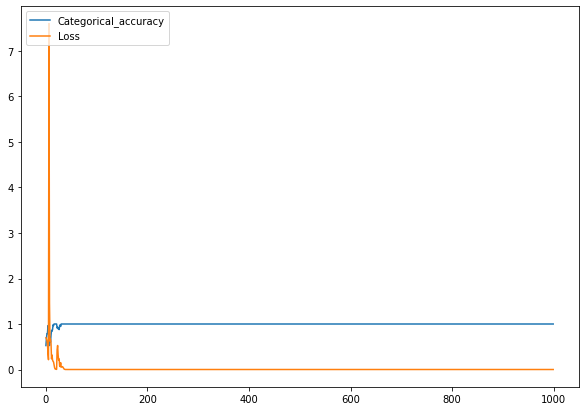

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(history.history['categorical_accuracy'], label="Categorical_accuracy")
plt.plot(history.history['loss'], label="Loss")
plt.legend(loc='upper left')
plt.show()

In [37]:
plt.plot??

In [69]:
model.load_weights("action3.h5")

In [22]:
#Evaluate
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [23]:
yhat = model.predict(X_train)

In [24]:
yhat = np.argmax(yhat, axis=1).tolist()
ytrue = np.argmax(y_train, axis=1).tolist()


In [25]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[28,  0],
        [ 0, 29]],

       [[29,  0],
        [ 0, 28]]])

In [26]:
accuracy_score(ytrue, yhat)

1.0

In [27]:
#data test
#PRedict
res = model.predict(X_test)
res = np.argmax(res, axis=1).tolist()
ytest_true = np.argmax(y_test,axis=1).tolist()

In [28]:
accuracy_score(res, ytest_true)

1.0

In [73]:
len(res)

54

In [29]:
print(actions[np.argmax(res[0])])
print(actions[np.argmax(res[1])])
print(actions[np.argmax(res[2])])

Like
Like
Like


In [49]:
y_test

array([[1, 0],
       [1, 0],
       [0, 1]])

In [30]:
X_test.shape

(3, 30, 232)

In [31]:
X_train.shape

(57, 30, 232)

In [ ]:
PATH_CHECKPOINT = "shufflenetv2k16-wholebody"
PATH_VIDEO = "VideoTest/UploadServer/tracking1.mp4"
PATH_JSON_OUTPUT = "VideoTest/JsonVideo/jsonvideo1.json"
PATH_VIDEO_OUTPUT = "VideoTest/VideoOutput/output1.mp4"

In [ ]:
os.system("python3 -m openpifpaf.video --source="+PATH_VIDEO+
         " --checkpoint="+PATH_CHECKPOINT+
         " --line-width 1 --json-output "+PATH_JSON_OUTPUT+
         " --video-output "+PATH_VIDEO_OUTPUT+
         " --show-box")

In [ ]:
#List contain keypoints of each frame
tweets = []
for line in open(PATH_JSON_OUTPUT, "r"):
    tweets.append(json.loads(line))

In [ ]:
video = cv2.VideoCapture(PATH_VIDEO_OUTPUT)
result = cv2.VideoWriter('VideoTest/Video/VideoResult1.avi',
                         cv2.VideoWriter_fourcc(*'MJPG'),
                         10, (int(video.get(3)), int(video.get(4))))

In [ ]:
k = 1   #Index Frame

sequence = []
sentence = []

while True:
    _, image = video.read()
    height, width, _ = image.shape
    print("Frame: ",k)
    for i in range(len(tweets[k]['predictions'])):
        person = tweets[k]['predictions'][i]
        
        list_keypoint = person['keypoints']
        x_coord = [int(list_keypoint[i])/width for i in range(0, len(list_keypoint), 3)]
        y_coord = [int(list_keypoint[i])/height for i in range(1, len(list_keypoint), 3)]

        keypoints = exact_keypoints(x_coord, y_coord)
        sequence.insert(0, keypoints)
        sequence = sequence[:30]
        
        if len(sequence) == 30:   
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            cv2.putText(image, actions[np.argmax(res)], (20, 20), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)
          
    result.write(image)
    cv2.waitKey(1)
    k += 1
cap.release()
cv2.destroyAllWindows()